In [38]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})

from src.util import read_json, sma
from config import config

In [39]:
agent_ids = [0]
agent_ids = [str(s) for s in agent_ids]

cases = [910, 27308, 62048, 83060, 90756, 91527, 98385]
cases = [str(c) for c in cases]

agent_type = "ThompsonTabularQFunction"
env = "FrozenLake-v0"

output_dirs = []
for i in range(len(cases)):
    for id_ in agent_ids:
        o = "{}/{}/{}{}/{}".format(config.resultsDir, env, agent_type, cases[i], id_)
        output_dirs.append(o)

In [40]:
print(output_dirs)

['/home/marsdenlab/projects/distributed_rl/results/FrozenLake-v0/ThompsonTabularQFunction910/0', '/home/marsdenlab/projects/distributed_rl/results/FrozenLake-v0/ThompsonTabularQFunction27308/0', '/home/marsdenlab/projects/distributed_rl/results/FrozenLake-v0/ThompsonTabularQFunction62048/0', '/home/marsdenlab/projects/distributed_rl/results/FrozenLake-v0/ThompsonTabularQFunction83060/0', '/home/marsdenlab/projects/distributed_rl/results/FrozenLake-v0/ThompsonTabularQFunction90756/0', '/home/marsdenlab/projects/distributed_rl/results/FrozenLake-v0/ThompsonTabularQFunction91527/0', '/home/marsdenlab/projects/distributed_rl/results/FrozenLake-v0/ThompsonTabularQFunction98385/0']


In [41]:
rewards = []
for output_dir in output_dirs:
    print(output_dir)
    
    reward_arr = []
    episodes = sorted(os.listdir(output_dir),key=lambda x: int(x))
    print(len(episodes))
    for e in episodes:
        
        d = results_dir + '/' + e
        files = os.listdir(d)

        steps = []
        for f in files:
            fn = d+'/'+f
            j = read_json(fn)
            steps.append(j)
            
        R = np.sum([d['r'] for d in steps])
        reward_arr.append(R)
        
    rewards.append(np.array(reward_arr))

rewards = np.array(rewards)

/home/marsdenlab/projects/distributed_rl/results/FrozenLake-v0/ThompsonTabularQFunction910/0
100000


KeyboardInterrupt: 

In [36]:
print(rewards.shape)

(2, 100000)


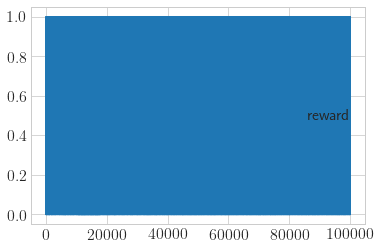

In [37]:
avg_rewards = np.mean(rewards,axis=0)

plt.figure()
plt.plot(avg_rewards,label='reward')
plt.legend()
plt.show()
plt.close()

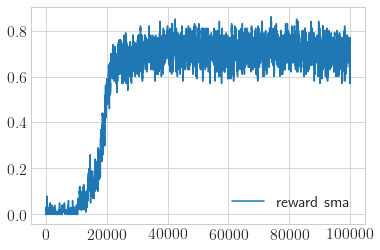

In [29]:
plt.figure()
plt.plot(rewards_avg[10:],label='reward sma')
plt.legend()
plt.show()
plt.close()